# Ch.05 Regression

### 5.4 보스턴 주택 가격 예측

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF ['PRICE'] = boston.target
print('Boston데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
bostonDF.shape

(506, 14)

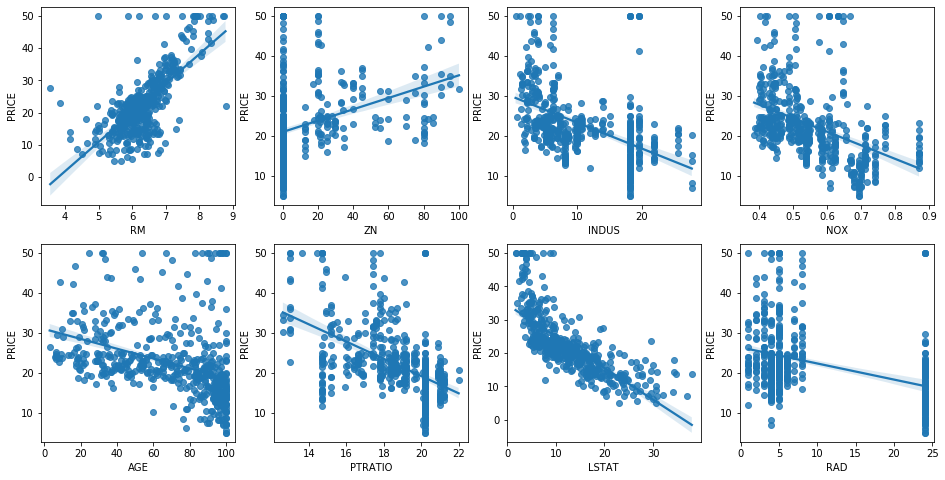

In [8]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE', 'PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [9]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 단일 변수에 대한 선형 회기

In [11]:
X = bostonDF['RM']
Y = boston.target

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state =11)

In [13]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [14]:
sim_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
boston.data[:5,:]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

- 결과 예측하기

In [16]:
y_pred = sim_lr.predict(x_test.values.reshape(-1,1))

- 결과 확인하기

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.35888030440010465

In [18]:
sim_lr.coef_,sim_lr.intercept_

(array([9.47800017]), -36.796784068556796)

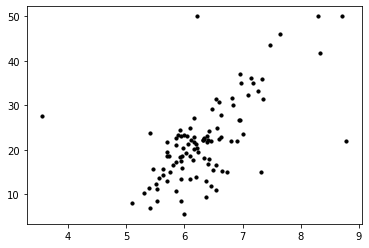

In [19]:
plt.scatter(x_test,y_test, s=10,c='black')
plt.show()

In [20]:
line_x= np.linspace(np.min(x_test),np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

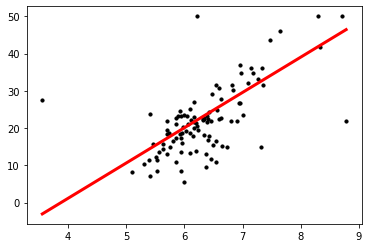

In [21]:

plt.scatter(x_test,y_test, s=10,c='black')
plt.plot(line_x, line_y, c='red',lw=3)
plt.show()

In [22]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs * w + b

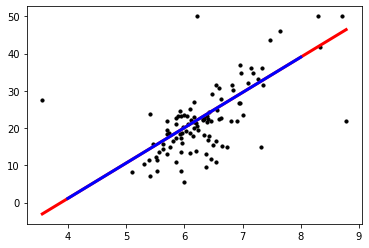

In [23]:
plt.scatter(x_test,y_test, s=10,c='black')
plt.plot(line_x, line_y, c='red',lw=3)
plt.plot(xs, ys, c='blue',lw=3)
plt.show()

## PRICE = 9.99 * RM -40.09
## 산점도와 회귀선 그리기

# PRICE vs LSTAT

In [24]:
X1 = bostonDF['LSTAT']
Y1 = boston.target

In [25]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1, test_size =0.2, random_state =19)

In [26]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [27]:
sim_lr.fit(x_train1.values.reshape(-1,1), y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred1 = sim_lr.predict(x_test1.values.reshape(-1,1))

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred1)

0.5197154926220184

In [30]:
sim_lr.coef_,sim_lr.intercept_

(array([-0.8922435]), 33.591648794612624)

In [31]:
line_x1= np.linspace(np.min(x_test1),np.max(x_test1), 10)
line_y1 = sim_lr.predict(line_x1.reshape(-1,1))

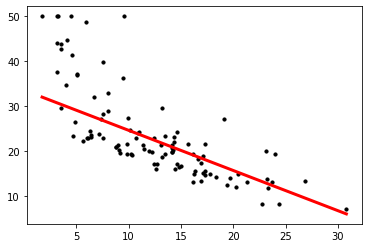

In [32]:
plt.scatter(x_test1,y_test1, s=10,c='black')
plt.plot(line_x1, line_y1, c='red',lw=3)
plt.show()

In [45]:
tp_bostonDF = tuple(bostonDF)
li_bostonDF = list(tp_bostonDF)
li_bostonDF.remove('CRIM')
li_bostonDF.remove('CHAS')
li_bostonDF.remove('DIS')
li_bostonDF.remove('TAX')
li_bostonDF.remove('B')
li_bostonDF.remove('PRICE')

X2 = bostonDF[li_bostonDF]
Y2 = boston.target
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [44]:
X2
Y2 = boston.target
Y2

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

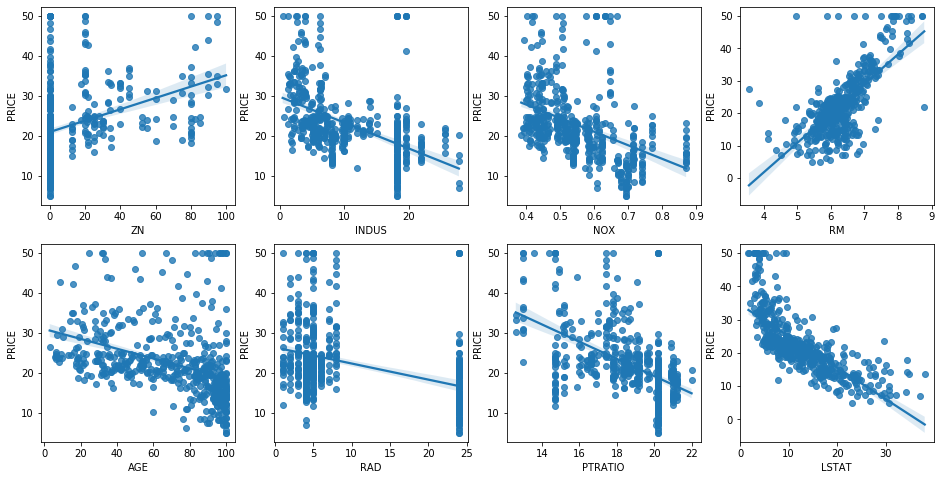

In [35]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)

for i in range(len(li_bostonDF)) :
    X2 = bostonDF[li_bostonDF[i]]
    x_train2, x_test2, y_train2, y_test2 =train_test_split(X2,Y2, test_size =0.2, random_state =19)
    sim_lr = LinearRegression()
    sim_lr.fit(x_train2.values.reshape(-1,1), y_train2)
    y_pred2 = sim_lr.predict(x_test2.values.reshape(-1,1))
    r2_score(y_test2, y_pred2)
    sim_lr.coef_,sim_lr.intercept_
    line_x2= np.linspace(np.min(x_test2),np.max(x_test2), 10)
    line_y2 = sim_lr.predict(line_x2.reshape(-1,1))
    
    row = int(i/4)
    col = i%4
    sns.regplot(x=X2, y='PRICE', data=bostonDF, ax=axs[row][col])


In [36]:
#그래프에 한글 표시

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False #minus 표시
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['font.size'] = 14

In [37]:
from sklearn.metics import mean_

ModuleNotFoundError: No module named 'sklearn.metics'

In [38]:
fig,axs = plt.subpots(figsize=(16,8), ncols=4, nrows =2, sharey=True)
lm_features = ['RM','ZN','INDUS','NOX','AGE','']

AttributeError: module 'matplotlib.pyplot' has no attribute 'subpots'

## 

In [39]:
from sklearn.l

SyntaxError: invalid syntax (<ipython-input-39-695211996fbd>, line 1)

# Decision Tree Regressor

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train.values.reshape(-1,1),y_train)
y_pred = dtr.predict(x_test.values.reshape(-1,1))
rmse_dtr = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
print(rmse_dtr)


6.69


In [41]:
# page 310
from sklearn.model_selection import cross_val_score
y_target = bostonDF('PRICE')
x_data = bostonDF.drop(['PRICE'], axis=1, inplace = False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

np.round(neg_mse_scores,2)

TypeError: 'DataFrame' object is not callable

## Support Vector Machine Regressor

In [ ]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train.values.reshape(-1,1),y_train)
y_pred = svr.predict(x_test.values.reshape(-1,1))
rmse_svr = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
print(rmse_svr)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'])

# 다중 회귀

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF ['PRICE'] = boston.target
print('Boston데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3,
                                                  random_state =156)
lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print("MSE : {0:.3f}, RMSE : {1:.3F}".format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)) )

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [43]:
print('절편 값 :', lr.intercept_)
print('회귀 계수값 :',np.round(lr.coef_,1))

절편 값 : 40.995595172164336
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [46]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [49]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print (' 5 folds 의 개별 Negative MSE scores :',np.round(neg_mse_scores,2))
print (' 5 folds 의 개별 RMSE scores :',np.round(rmse_scores,2))
print (' 5 folds 의 개별 RMSE :{0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 개별 RMSE :5.829


# 다항 회귀

In [ ]:
x_train, x_test, y_train, y_test

In [50]:
lr = linearRegression()
lr.fit(pf_train, y_train)

y_pred = lr.predict(pf_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
rmse

NameError: name 'linearRegression' is not defined

In [51]:
lr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [52]:
lr.intercept

AttributeError: 'LinearRegression' object has no attribute 'intercept'

In [53]:
xs = np.linspace(0,31, 100)
line_x= poly.fit_transform(xs.reshape(-1,1))
line_y = lr.predict(line_x)
plt.scatter(x_test,y_test, s=10,c='black')
plt.plot(line_x, line_y, c='red',lw=3)
plt.xlim(0.31)
plt.xlabel('LSTAT')
plt.show()

NameError: name 'poly' is not defined

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha =10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="meg_mean_squared_error",cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

ValueError: 'meg_mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [57]:
alphas = [0,0.1,1,10,100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    
    neg_mse_scores = corss_val_score(ridge, X_data, y_target , scoring="neg_mean_squared_error",cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

NameError: name 'corss_val_score' is not defined

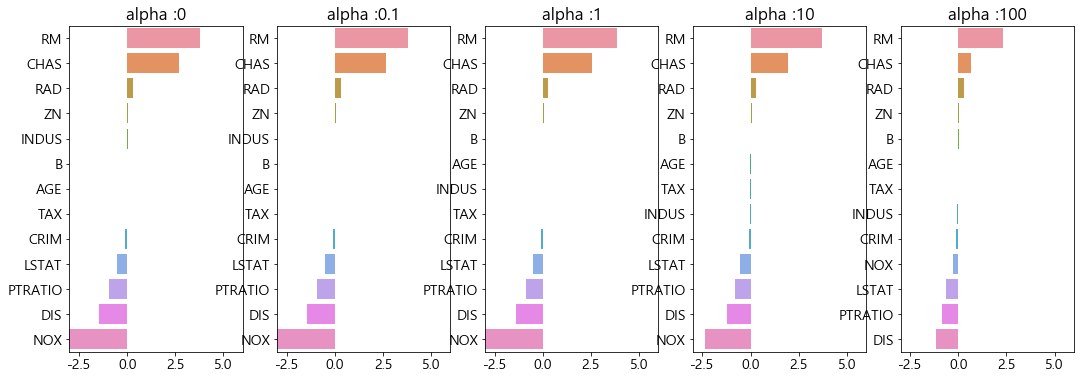

In [59]:
fig, axs = plt.subplots(figsize=(18,6),nrows =1, ncols=5)

coeff_df=pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    
    coeff = pd.Series(data=ridge.coef_,index=X_data.columns)
    colname = 'alpha :'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])


In [61]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending= False)

KeyError: 'alpha:0'

# 5.7 로지스틱 회귀

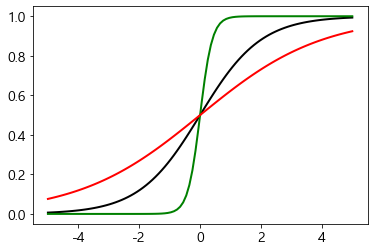

In [67]:
# w 값과 b값에 따른 시그모이드 함수의 변화
import numpy as np

def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))


xs = np.linspace(-5,5,100)
y1 = sigmoid(xs,1,0)
y5 = sigmoid(xs,5,0)
y02 = sigmoid(xs,0.5,0)
plt.plot(xs, y1, c='k',lw=2)
plt.plot(xs, y5, c='g',lw=2)
plt.plot(xs, y02, c='r',lw=2)

plt.show()

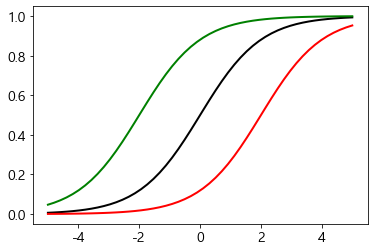

In [68]:
xs = np.linspace(-5,5)
y0 = sigmoid(xs,1,0)
y2p = sigmoid(xs,1,2)
y2m = sigmoid(xs,1,-2)
plt.plot(xs, y0, c='k',lw=2)
plt.plot(xs, y2p, c='g',lw=2)
plt.plot(xs, y2m, c='r',lw=2)

plt.show()

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                    test_size = 0.3, random_state = 0)


In [72]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)


print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [75]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2','l1'],
         'C':[0.01,0.1,1,15,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring = 'accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_,
                                                                         grid_clf.best_score_))


최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.975


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\

In [92]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE']= boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators =1000)
neg_mes_scores = cross_val_score(rf,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 교차 검증의 개별 RMSE :{0:.3f}'.format(avg_rmse))


5 교차 검증의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 교차 검증의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 교차 검증의 개별 RMSE :5.829


In [93]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####',model.__class__.__name__,'#####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor


dt_reg = DecisionTreeRegressor(random_state =0, max_depth=4)
rf_reg = RandomForestRegressor(random_state =0 , n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state =0 , n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
#lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg,gb_reg,xgb_reg]
for model in models :
    get_model_cv_prediction(model,X_data,y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.978
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.269
[13:35:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.089


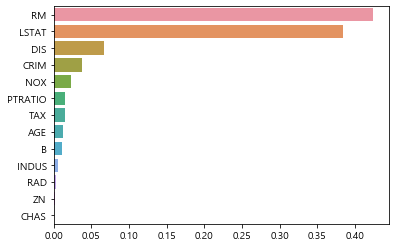

In [99]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators =1000)

rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_,index =X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)



(506, 2)


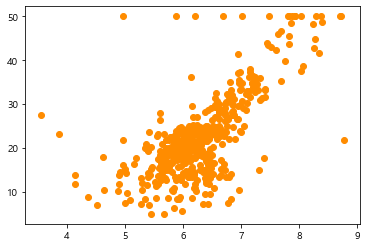

In [100]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_smaple = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [103]:
import numpy as np

from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target =  bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

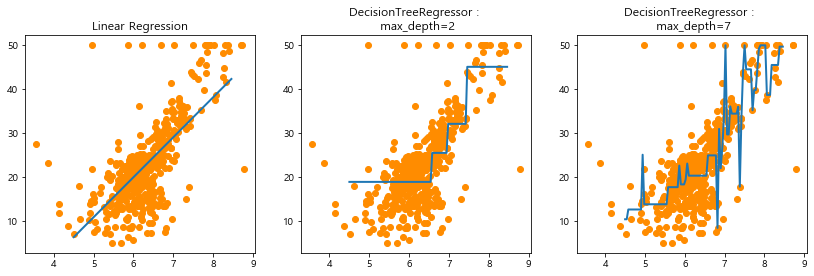

In [105]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(14,4),ncols=3)


ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test,pred_lr,label="linear",linewidth=2)

ax2.set_title('DecisionTreeRegressor : \n max_depth=2')
ax2.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test,pred_rf2,label=" max_depth=3",linewidth=2)

ax3.set_title('DecisionTreeRegressor : \n max_depth=7')
ax3.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test,pred_rf7,label=" max_depth=7",linewidth=2)

# 자전거 대여 수요 예측

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [108]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [109]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [110]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [111]:
drop_columns =['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle


def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))


def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE : {0:.3f}, RMSE : {1:.3F}, MAE : {2:.3F}'.format(rmsle_val,rmse_val,mae_val))


In [127]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size =0.3,
                                                       random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


In [128]:
def get_top_error_data(y_test,pred,n_tops = 5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


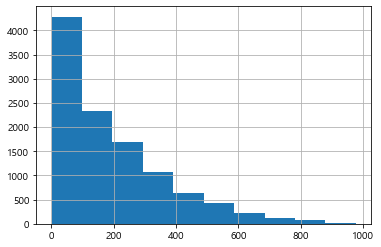

In [129]:
y_target.hist()

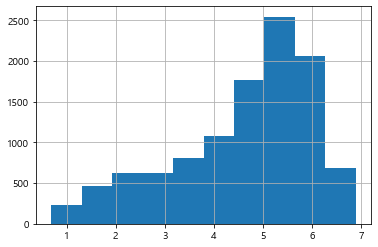

In [130]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [133]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features,y_target_log, test_size =0.3,
                                                       random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)


y_test_exp = np.expm1(y_test)

pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp,pred_exp)

RMSLE : 1.017, RMSE : 162.594, MAE : 109.286


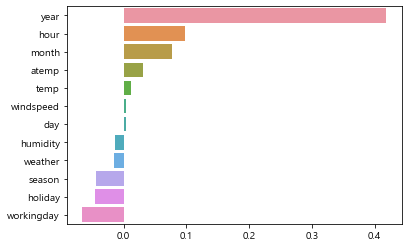

In [134]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [137]:
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','day', 'hour','holiday',\
                                                     'workingday', 'season', 'weather'])

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe,y_target_log,
                                                    test_size =0.3,random_state=0)

def get_model_predict(model,X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        
        
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
    
    
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg,lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.590, RMSE : 97.687, MAE : 63.381
### Ridge ###
RMSLE : 0.590, RMSE : 98.529, MAE : 63.893
### Lasso ###
RMSLE : 0.635, RMSE : 113.219, MAE : 72.803


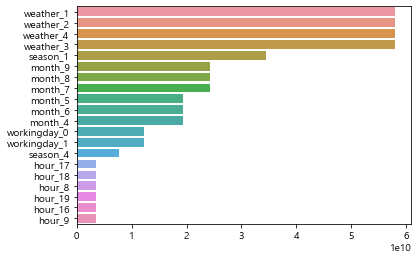

In [146]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [144]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
#lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg,gbm_reg,xgb_reg]:
    get_model_predict(model,X_train.values, X_test.values,
                      y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE : 0.354, RMSE : 50.079, MAE : 31.037
### GradientBoostingRegressor ###
RMSLE : 0.330, RMSE : 53.330, MAE : 32.735
[16:03:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE : 0.345, RMSE : 58.245, MAE : 35.768
